In [1]:
import networkx as nx
from scipy import linalg as ln
import numpy as np
import time as tm
import matplotlib.pyplot as plt
from statistics import mean
import os
import csv
from qwak.Operator import Operator
from utils.plotTools import plot_qwak


from OperatorBenchmark3 import OperatorBenchmark3

In [79]:
def benchmark_operations(n, tList, base_filename, samples):
    graph = nx.cycle_graph(n)
    eig_runTime = []
    expm_runTime = []
    eig_filename = f"{base_filename}_eig.csv"
    expm_filename = f"{base_filename}_expm.csv"
    
    if os.path.exists(eig_filename) and os.path.exists(expm_filename):
        print('Files found!')
        with open(eig_filename, "r") as f:
            reader = csv.reader(f)
            next(reader)  # Skip header
            eig_runTime = list(map(float, next(reader)))
            print(f'{eig_filename} exists!')
                
        with open(expm_filename, "r") as f:
            reader = csv.reader(f)
            next(reader)  # Skip header
            expm_runTime = list(map(float, next(reader)))
            print(f'{expm_filename} exists!')
        return eig_runTime, expm_runTime
    
    else:
        print('Files not found!')
        op = OperatorBenchmark3(graph)
        opAdjTime = op.buildAdjacencyTimed()
        opEigTime = op.buildEigenTimed()
        op_init_run_time = opAdjTime + opEigTime

        for time in tList:
            total_runOp_run_time = 0
            for _ in range(samples):
                for t in range(0, time):
                    runOp_run_time = op.buildDiagonalOperatorNoEigTimed(graph=graph, time=t)
                    total_runOp_run_time += runOp_run_time
            avg_runOp_run_time = total_runOp_run_time / samples
            eig_runTime.append(avg_runOp_run_time + op_init_run_time)
            op_init_run_time = 0

        # Time the buildDiagonalOperator method for expm
        op2 = OperatorBenchmark3(graph)
        op2AdjTime = op2.buildAdjacencyTimed()

        for time in tList:
            print(f'Expm time: {time}')
            total_runOp2_run_time = 0
            for s in range(samples):
                # if s%%2 == 0:
                print(f'----> Sample: {s}')
                for t in range(0, time):
                    runOp2_run_time = op2.buildSlowDiagonalOperatorNoAdjTimed(graph=graph, time=t)
                    total_runOp2_run_time += runOp2_run_time
            avg_runOp2_run_time = total_runOp2_run_time / samples
            expm_runTime.append(avg_runOp2_run_time + op2AdjTime)
            op2AdjTime = 0
            
        with open(eig_filename, "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerow(["Eig RunTime"])
            writer.writerow(eig_runTime)

        # Save to CSV
        with open(expm_filename, "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerow(["Expm RunTime"])
            writer.writerow(expm_runTime)

        return eig_runTime, expm_runTime

In [90]:
legend_labels = ['Diagonal', 'Expm']

params = {
    'figsize': (12, 7),
    'plot_title' : f'Benchmark',
    'x_label' : 'Number of Walks',
    'y_label' : "Time",
    'legend_labels' : legend_labels,
    'legend_loc': "best",
    # 'legend_title' : 'Solutions',
    'legend_ncol' : 1,
    # 'color_list' : ['#0000FF', '#008000', '#525252'],
    'color_list' : ['b','g','r'],
    # 'line_style_list' : ['--', '-','-.' ],
    'save_path' : f'img/dynamicBenchmark_N{n}_WSTART{start}_WEND{stop}_WST{step}_SAMP{samples}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    'x_num_ticks' : 10,
    'y_num_ticks' : 5,
    'x_round_val' : 2,
    'y_round_val' : 3,
    # 'v_line_values' : v_line_values,
    # 'v_line_style': '--',
    'title_font_size': 20,
    'xlabel_font_size': 18,
    'ylabel_font_size': 18,
    'legend_font_size': 14,
    'legend_title_font_size': 14,
    'tick_font_size': 15,
    # 'cbar_label_font_size': 16,
    'use_grid':True,
    'marker_list': ['x', 'o']
}

# Example usage
n = 20
start = 1
stop = 30
step = 1
samples = 100

tList = list(range(start, stop, step))

filename = f'Datasets/OperatorBenchmark/Dynamic/dynamicBenchmark_N{n}_WSTART{start}_WEND{stop}_WST{step}_SAMP{samples}'

eig_runTime, expm_runTime = benchmark_operations(n, tList, filename, samples)

y_values = [eig_runTime, expm_runTime]
x_values = [tList]*2

Files not found!
Expm time: 1
----> Sample: 0
----> Sample: 1
----> Sample: 2
----> Sample: 3
----> Sample: 4
----> Sample: 5
----> Sample: 6
----> Sample: 7
----> Sample: 8
----> Sample: 9
----> Sample: 10
----> Sample: 11
----> Sample: 12
----> Sample: 13
----> Sample: 14
----> Sample: 15
----> Sample: 16
----> Sample: 17
----> Sample: 18
----> Sample: 19
----> Sample: 20
----> Sample: 21
----> Sample: 22
----> Sample: 23
----> Sample: 24
----> Sample: 25
----> Sample: 26
----> Sample: 27
----> Sample: 28
----> Sample: 29
----> Sample: 30
----> Sample: 31
----> Sample: 32
----> Sample: 33
----> Sample: 34
----> Sample: 35
----> Sample: 36
----> Sample: 37
----> Sample: 38
----> Sample: 39
----> Sample: 40
----> Sample: 41
----> Sample: 42
----> Sample: 43
----> Sample: 44
----> Sample: 45
----> Sample: 46
----> Sample: 47
----> Sample: 48
----> Sample: 49
----> Sample: 50
----> Sample: 51
----> Sample: 52
----> Sample: 53
----> Sample: 54
----> Sample: 55
----> Sample: 56
----> Sampl

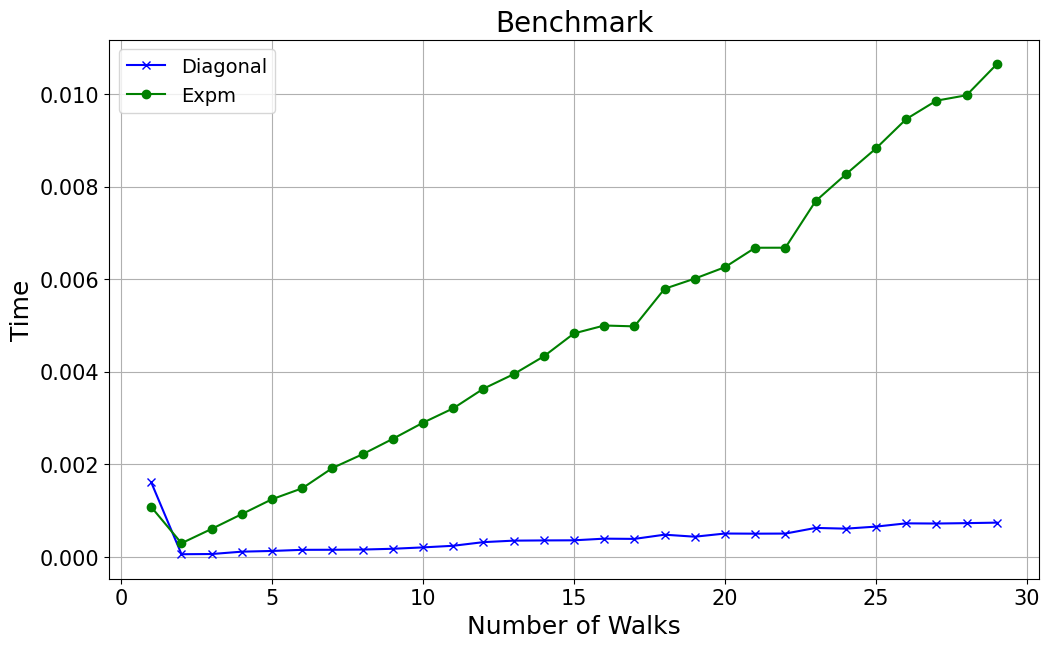

In [91]:
plot_qwak(x_value_matrix = x_values, y_value_matrix = y_values,**params)

In [95]:
legend_labels = ['Diagonal', 'Expm']

params = {
    'figsize': (12, 7),
    'plot_title' : f'Benchmark',
    'x_label' : 'Number of Walks',
    'y_label' : "Time",
    'legend_labels' : legend_labels,
    'legend_loc': "best",
    # 'legend_title' : 'Solutions',
    'legend_ncol' : 1,
    # 'color_list' : ['#0000FF', '#008000', '#525252'],
    'color_list' : ['b','g','r'],
    # 'line_style_list' : ['--', '-','-.' ],
    'save_path' : f'img/dynamicBenchmark_N{n}_WSTART{start}_WEND{stop}_WST{step}_SAMP{samples}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    'x_num_ticks' : 10,
    'y_num_ticks' : 5,
    'x_round_val' : 2,
    'y_round_val' : 3,
    # 'v_line_values' : v_line_values,
    # 'v_line_style': '--',
    'title_font_size': 20,
    'xlabel_font_size': 18,
    'ylabel_font_size': 18,
    'legend_font_size': 14,
    'legend_title_font_size': 14,
    'tick_font_size': 15,
    # 'cbar_label_font_size': 16,
    'use_grid':True,
    'marker_list': ['x', 'o']
}

# Example usage
n = 200
start = 1
stop = 20
step = 1
samples = 2

tList = list(range(start, stop, step))

filename = f'Datasets/OperatorBenchmark/Dynamic/dynamicBenchmark_N{n}_WSTART{start}_WEND{stop}_WST{step}_SAMP{samples}'

eig_runTime, expm_runTime = benchmark_operations(n, tList, filename, samples)

y_values = [eig_runTime, expm_runTime]
x_values = [tList]*2

Files found!
Datasets/OperatorBenchmark/Dynamic/dynamicBenchmark_N200_WSTART1_WEND20_WST1_SAMP2_eig.csv exists!
Datasets/OperatorBenchmark/Dynamic/dynamicBenchmark_N200_WSTART1_WEND20_WST1_SAMP2_expm.csv exists!


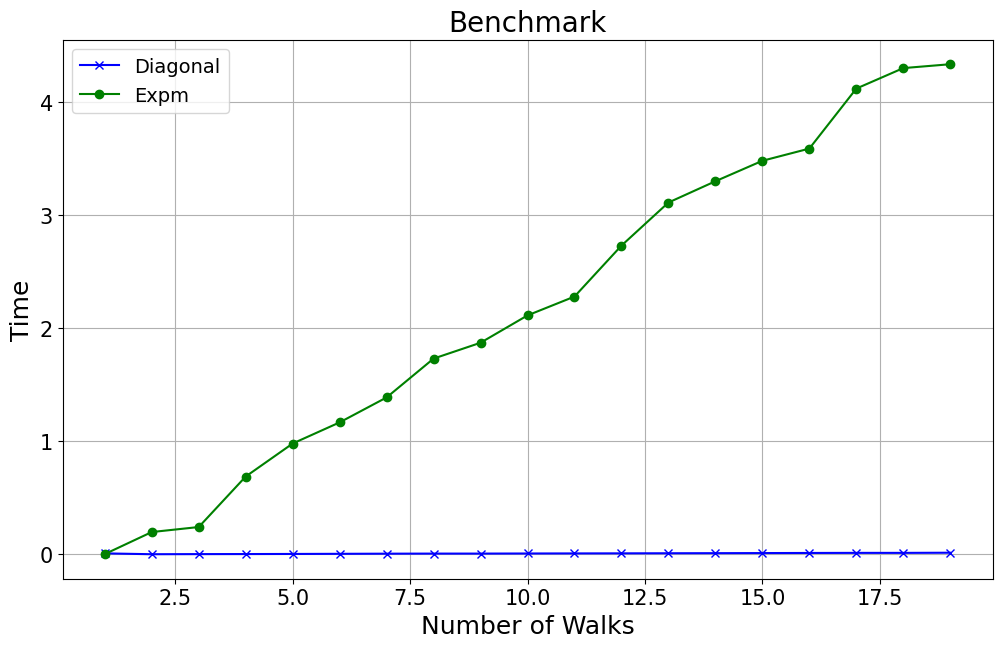

In [96]:
plot_qwak(x_value_matrix = x_values, y_value_matrix = y_values,**params)

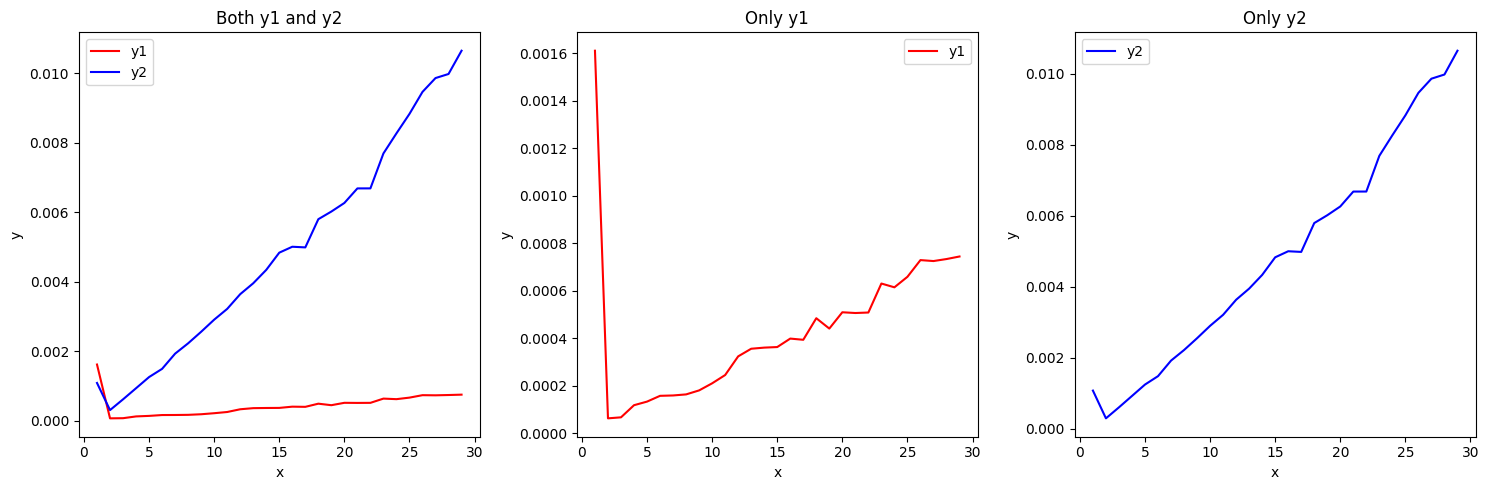

In [ ]:
def plot_three_figures(x, y1, y2):
    # Create a figure and a 1x3 grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # First subplot: both y1 and y2
    axs[0].plot(x, y1, label='y1', color='r')
    axs[0].plot(x, y2, label='y2', color='b')
    axs[0].set_title('Both y1 and y2')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].legend()
    
    # Second subplot: only y1
    axs[1].plot(x, y1, label='y1', color='r')
    axs[1].set_title('Only y1')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].legend()
    
    # Third subplot: only y2
    axs[2].plot(x, y2, label='y2', color='b')
    axs[2].set_title('Only y2')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y')
    axs[2].legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_three_figures(tList,eig_runTime,expm_runTime)